# 0. Initialize

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from gym_poly_reactor.envs.poly_reactor_env import PolyReactor

In [3]:
%matplotlib inline

# 1. 환경 불러오기 (Gym-PolyReactor)

In [4]:
env = PolyReactor()

/Users/leehoon/anaconda3/envs/RL/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### 환경의 state / action_dimension을 체크
- 나중에 trajectory를 출력해보기 위함.

In [5]:
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

In [10]:
action_list = ["m_DOT_F", "T_IN_M", "T_IN_AWT"]
state_list = ["m_w", "m_a", "m_p", "T_R", "T_S", "T_M", "T_EK", "T_AWT", "T_adiab", "m_acc"]

### 1-1. Main running code with random action

In [8]:
state = env.reset()

state_trajectory = []
action_trajectory = []

for _ in range(10000):
    action = env.action_space.sample()
    next_state, _, done, info = env.step(action)
    unnormalized_state = info['unnormalized_state']
    
    state_trajectory.append(unnormalized_state)
    action_trajectory.append(action)

    if done:
        break

# 2. State, Action에 대한 Trajectory 확인해보기
### 2-1. State Trajectory

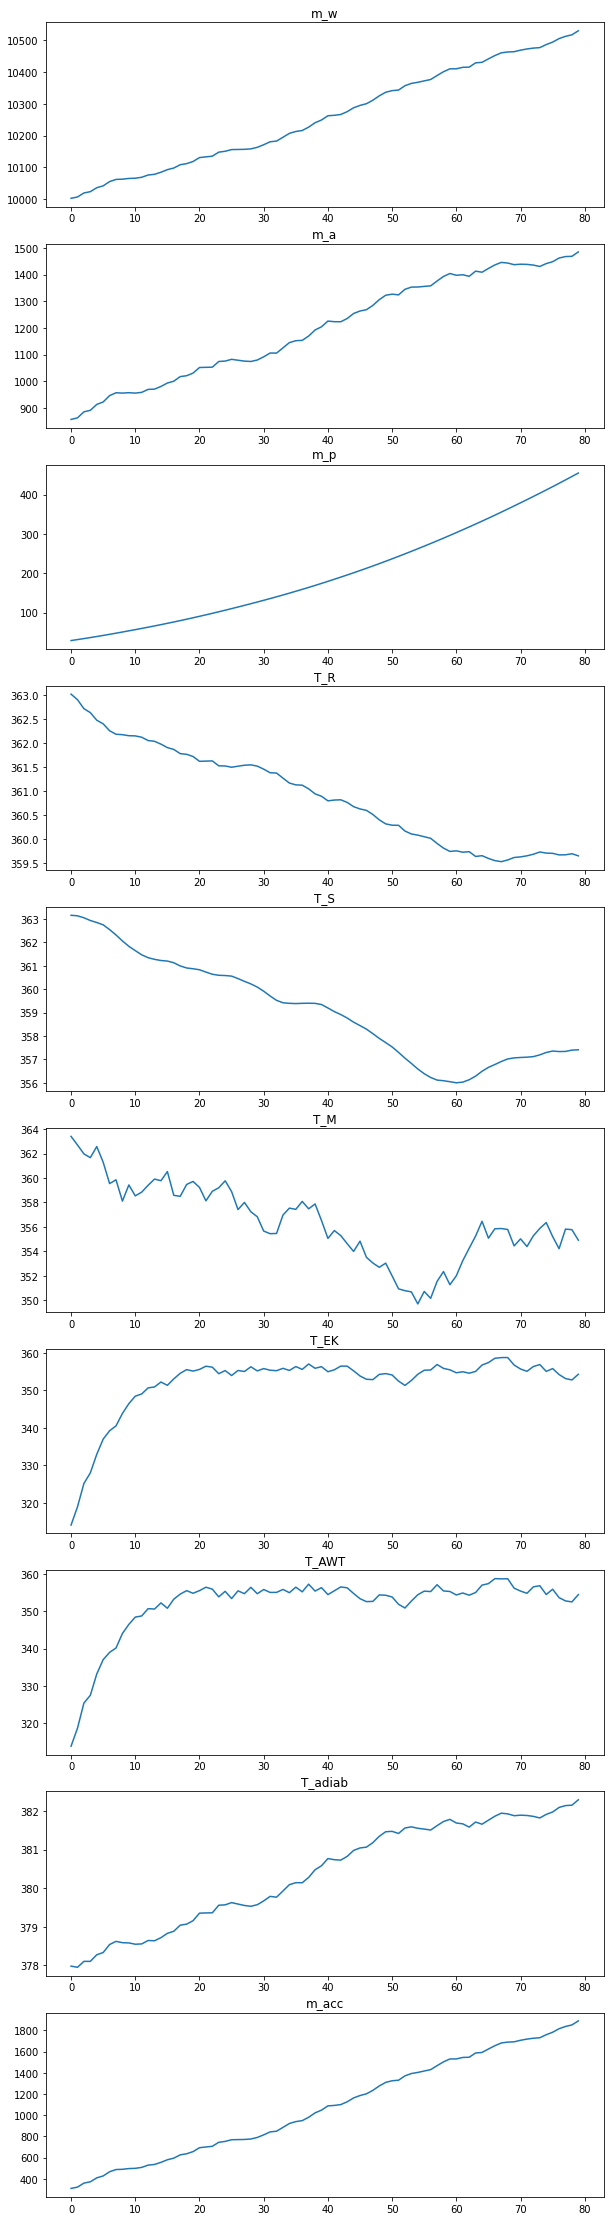

In [14]:
full_trajectory = np.array(state_trajectory)
fig, axs = plt.subplots(state_dim, 1, figsize=(10, 40))

for i, ax in enumerate(axs):
    ax.plot(full_trajectory[:, i])
    ax.set_title(state_list[i])

plt.show()

### 2-1. Action Trajectory

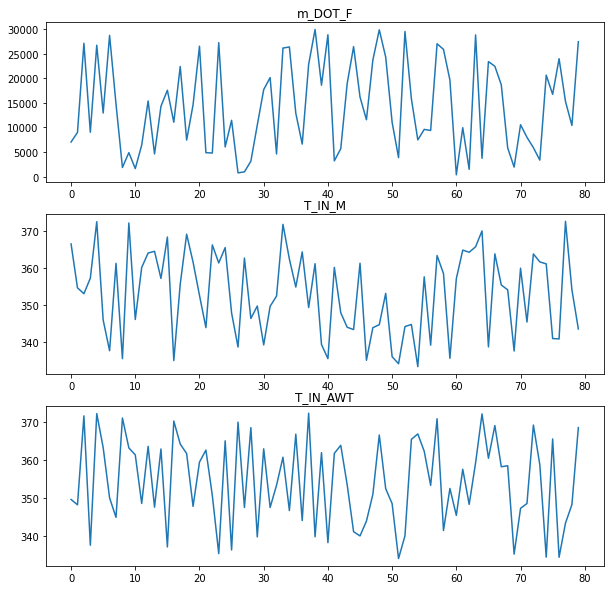

In [15]:
action_trajectory = np.array(action_trajectory)
fig, axs = plt.subplots(action_dim, 1, figsize=(10, 10))

for i, ax in enumerate(axs):
    ax.plot(action_trajectory[:, i])
    ax.set_title(action_list[i])


plt.show()